# Postgraduate Major Project (2019 MOD002726 TRI3 F01CAM/TRI3-1 F02CAM)

### Element 010

### Student ID: 0925739

# An LSTM based approach to classification of mental health issues using Natural Language Processing

## Project Code

The mostly used libraries are first loaded in the cell below.

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

The dataset used for the project is then loaded from the csv file into a pandas dataframe.

In [3]:
counseldf = pd.read_csv('counselchat-data.csv')

The below function prints the columns available within the dataset.

In [4]:
print(chatdf.columns)

Index(['questionID', 'questionTitle', 'questionText', 'questionUrl', 'topics',
       'therapistName', 'therapistUrl', 'answerText', 'upvotes'],
      dtype='object')


Below the first 5 samples within the dataset are displayed.

In [6]:
counseldf.head()

,questionID,questionTitle,questionText,questionUrl,topics,therapistName,therapistUrl,answerText,upvotes
0,5566fab2a64752d71ec3ca69,Escalating disagreements between mother and wife,My wife and mother are having tense disagreeme...,https://counselchat.com/questions/escalating-d...,Family Conflict,"Kristi King-Morgan, LMSW",https://counselchat.com/therapists/kristi-king...,<p>What you are describing is something psycho...,0
1,5566f94fa64752d71ec3ca64,I'm addicted to smoking. How can I stop?,"I'm planning to have baby, so I have to quit s...",https://counselchat.com/questions/i-m-addicted...,"Substance Abuse,Addiction",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>Hi. Good for you in planning ahead to do wh...,0
2,5567d26887a1cc0c3f3d8f46,Keeping secrets from my family,"I have secrets in my mind, and I don't know wh...",https://counselchat.com/questions/keeping-secr...,Family Conflict,Jeevna Bajaj,https://counselchat.com/therapists/jeevna-bajaj,<p>It sounds like keeping the secrets has beco...,0
3,556bed15c969ba5861709df5,The Underlying Causes of Being Possessive,I am extremely possessive in my relationships ...,https://counselchat.com/questions/the-underlyi...,"Behavioral Change,Social Relationships",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>Hi there. It's great you are able to realiz...,0
4,556ba115c969ba5861709de6,Can I control anxiety without medication?,I had a head injury a few years ago and my min...,https://counselchat.com/questions/can-i-contro...,Anxiety,Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>You didn't say what or how many medications...,0


As the dataset contains some columns with personal information about the therapist, those columns are removed. Moreover, for the purposes of this project the only relevant columns are 'questionText' and 'topics'. Hence all other columns except those are removed before further processing.

In [7]:
counseldf.drop(['questionID', 'questionTitle', 'questionUrl', 'therapistName', 'therapistUrl','answerText', 'upvotes'], axis = 1, inplace=True)

In [8]:
counseldf.head()

,questionText,topics
0,My wife and mother are having tense disagreeme...,Family Conflict
1,"I'm planning to have baby, so I have to quit s...","Substance Abuse,Addiction"
2,"I have secrets in my mind, and I don't know wh...",Family Conflict
3,I am extremely possessive in my relationships ...,"Behavioral Change,Social Relationships"
4,I had a head injury a few years ago and my min...,Anxiety


In [10]:
counseldf.shape

(1482, 2)

In [14]:
counseldf.isnull().sum()

questionText    99
topics          10
dtype: int64

The datset contains some null values in both columns. To avoid the problem created by null values, the samples containing them are simply removed.

In [15]:
counseldf = counseldf.dropna(axis=0)

In [16]:
counseldf.isnull().sum()

questionText    0
topics          0
dtype: int64

In [17]:
counseldf.shape

(1376, 2)

Finally, we have the clean dataset which can now be processed with NLP techniques. After removing rows with null values, the size of the dataset remains at 1376 samples.

The 'topics' column is the target categories for the samples. As seen in the first few lines, some of the samples contain multiple labels. An LSTM network was tried to train using multiple labels but as the model failed to converge, it was decided that only the first label would be kept as the target label of the sample if it has multiple labels. The below code does just that.

In [19]:
counseldf['topics'] = counseldf['topics'].str.split(',')
counseldf['topics'] = counseldf['topics'].apply(lambda x: x[0])

In [20]:
counseldf.head()

,questionText,topics
0,My wife and mother are having tense disagreeme...,Family Conflict
1,"I'm planning to have baby, so I have to quit s...",Substance Abuse
2,"I have secrets in my mind, and I don't know wh...",Family Conflict
3,I am extremely possessive in my relationships ...,Behavioral Change
4,I had a head injury a few years ago and my min...,Anxiety


In [22]:
counseldf['topics'].value_counts()

Relationships                246
Anxiety                      178
Family Conflict              113
Depression                    97
Marriage                      89
Self-esteem                   64
Parenting                     59
Trauma                        51
Human Sexuality               45
Behavioral Change             43
Relationship Dissolution      42
Intimacy                      42
Counseling Fundamentals       39
Social Relationships          38
Anger Management              31
Professional Ethics           28
LGBTQ                         24
Stress                        24
Spirituality                  19
Grief and Loss                14
Substance Abuse               14
Addiction                     14
Legal & Regulatory            11
Sleep Improvement             10
Diagnosis                     10
Domestic Violence              9
Workplace Relationships        8
Eating Disorders               4
Military Issues                3
Children & Adolescents         3
Career Cou

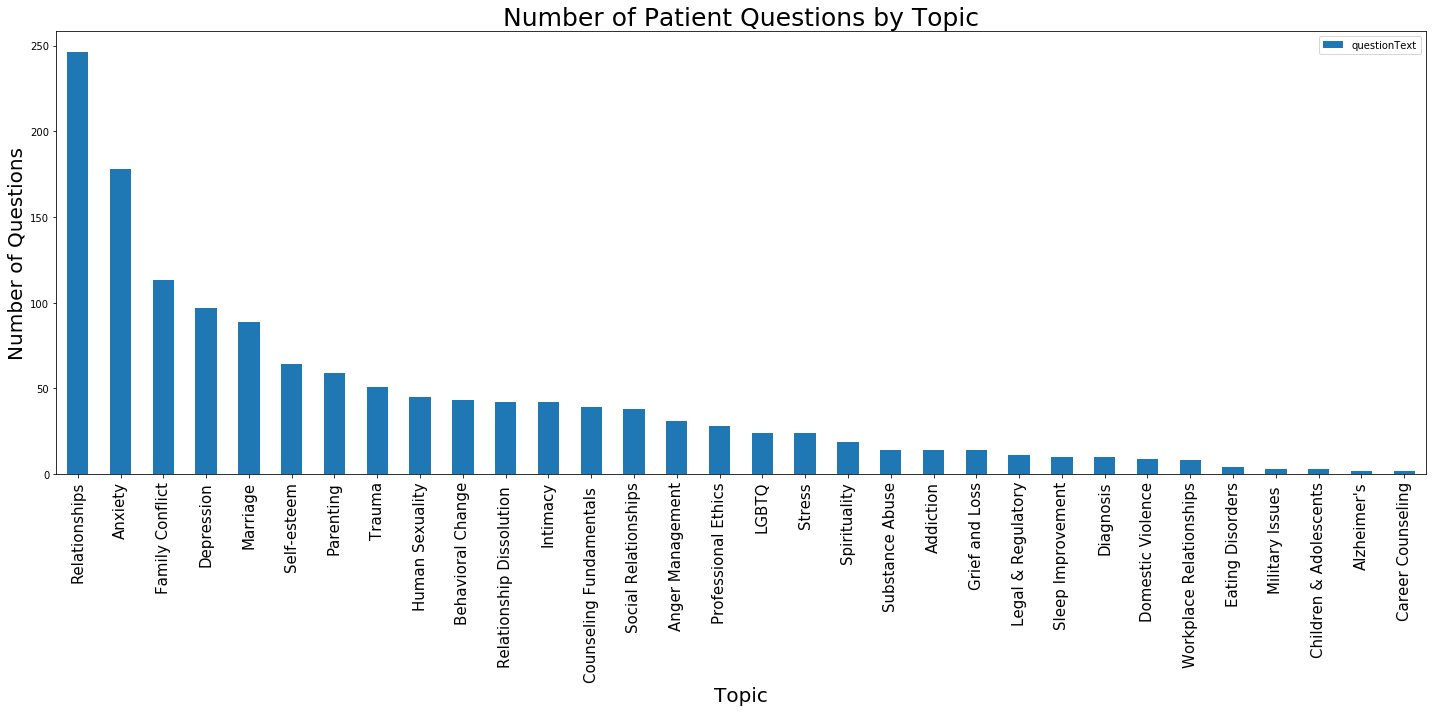

In [52]:
fig, ax = plt.subplots(figsize=(20, 10))
counseldf.groupby('topics').agg('count').sort_values('questionText', ascending=False).plot.bar(ax=ax)
ax.set_title("Number of Patient Questions by Topic", fontsize=25)
ax.set_ylabel("Number of Questions", fontsize=20)
ax.set_xlabel("Topic", fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
plt.tight_layout()
plt.show()

After this initial analysis to look at the overall dataset, the 'topics' column could be one-hot encoded so that it is ready for the learning model to take as targets.

In [53]:
targetdf = pd.get_dummies(counseldf['topics'])
targetdf.head()

,Addiction,Alzheimer's,Anger Management,Anxiety,Behavioral Change,Career Counseling,Children & Adolescents,Counseling Fundamentals,Depression,Diagnosis,...,Relationship Dissolution,Relationships,Self-esteem,Sleep Improvement,Social Relationships,Spirituality,Stress,Substance Abuse,Trauma,Workplace Relationships
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, finally it is time to apply natural language processing techniques to each of the individual text samples.

First, we define a pre-process function.

In [59]:
#Preprocess function


import nltk, re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

stop_words = stopwords.words('english')
normalizer = WordNetLemmatizer()

def get_part_of_speech(word):
    probable_part_of_speech = wordnet.synsets(word)
    pos_counts = Counter()
    pos_counts["n"] = len(  [ item for item in probable_part_of_speech if item.pos()=="n"]  )
    pos_counts["v"] = len(  [ item for item in probable_part_of_speech if item.pos()=="v"]  )
    pos_counts["a"] = len(  [ item for item in probable_part_of_speech if item.pos()=="a"]  )
    pos_counts["r"] = len(  [ item for item in probable_part_of_speech if item.pos()=="r"]  )
    most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
    return most_likely_part_of_speech

def preprocess_text(text):
    cleaned = re.sub(r'\W+', ' ', text).lower()
    tokenized = word_tokenize(cleaned)
    normalized = [normalizer.lemmatize(token, get_part_of_speech(token)) for token in tokenized]
    return normalized

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


The few cells below show the NLP pre-processing techniques applied to the first samples of text.

In [54]:
counseldf['questionText'][0]

'My wife and mother are having tense disagreements. In the past, they’ve had minor differences. For example, my wife would complain to me my mother is too overbearing; my mother would complain my wife is lazy.\r\nHowever, it’s intensified lately. I think the cause is my wife talked back to her once. Now, any little disagreement is magnified, leading to major disagreements. What can I do?'

In [58]:
text = counseldf['questionText'][0]
cleaned = re.sub(r'\W+', ' ', text).lower()
print(cleaned)

my wife and mother are having tense disagreements in the past they ve had minor differences for example my wife would complain to me my mother is too overbearing my mother would complain my wife is lazy however it s intensified lately i think the cause is my wife talked back to her once now any little disagreement is magnified leading to major disagreements what can i do 


In [60]:
tokenized = word_tokenize(cleaned)
print(tokenized)

['my', 'wife', 'and', 'mother', 'are', 'having', 'tense', 'disagreements', 'in', 'the', 'past', 'they', 've', 'had', 'minor', 'differences', 'for', 'example', 'my', 'wife', 'would', 'complain', 'to', 'me', 'my', 'mother', 'is', 'too', 'overbearing', 'my', 'mother', 'would', 'complain', 'my', 'wife', 'is', 'lazy', 'however', 'it', 's', 'intensified', 'lately', 'i', 'think', 'the', 'cause', 'is', 'my', 'wife', 'talked', 'back', 'to', 'her', 'once', 'now', 'any', 'little', 'disagreement', 'is', 'magnified', 'leading', 'to', 'major', 'disagreements', 'what', 'can', 'i', 'do']


In [61]:
normalized = [normalizer.lemmatize(token, get_part_of_speech(token)) for token in tokenized]
print(normalized)

['my', 'wife', 'and', 'mother', 'be', 'have', 'tense', 'disagreement', 'in', 'the', 'past', 'they', 've', 'have', 'minor', 'difference', 'for', 'example', 'my', 'wife', 'would', 'complain', 'to', 'me', 'my', 'mother', 'be', 'too', 'overbear', 'my', 'mother', 'would', 'complain', 'my', 'wife', 'be', 'lazy', 'however', 'it', 's', 'intensify', 'lately', 'i', 'think', 'the', 'cause', 'be', 'my', 'wife', 'talk', 'back', 'to', 'her', 'once', 'now', 'any', 'little', 'disagreement', 'be', 'magnify', 'lead', 'to', 'major', 'disagreement', 'what', 'can', 'i', 'do']


It is clear from the above few cells what pre-processing does to each of the samples. Below the same process is applied to the entire dataset calling the pre-process function defined above.

In [62]:
processed_questionText = counseldf['questionText'].apply(lambda x: preprocess_text(x))

After pre-processing, stop words removal can be done to each of the samples.

In [63]:
stop_words = set(stopwords.words('english'))

questionText_nostops = []
for title in processed_questionText:
    text_no_stops = [word for word in title if word not in stop_words]
    questionText_nostops.append(text_no_stops)

Below is the first sample with stop words removed.

In [64]:
print(questionText_nostops[0])

['wife', 'mother', 'tense', 'disagreement', 'past', 'minor', 'difference', 'example', 'wife', 'would', 'complain', 'mother', 'overbear', 'mother', 'would', 'complain', 'wife', 'lazy', 'however', 'intensify', 'lately', 'think', 'cause', 'wife', 'talk', 'back', 'little', 'disagreement', 'magnify', 'lead', 'major', 'disagreement']


Finally, with the tokens available for all samples, it is time to create the word-index dictionary for changing the data to numerical values. To do this, Tensorflow's tokenizer class will be used.

In [147]:
import tensorflow as tf
from tensorflow.keras import preprocessing

tf.random.set_seed(4)
tf.__version__

'2.2.0'

In [188]:
tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts( questionText_nostops ) 
tokenized_questions = tokenizer.texts_to_sequences( questionText_nostops ) 
print('Sample tokenized: {}'.format(tokenized_questions[0]))
print('==================================================================================================================\n')

length_list = list()
for token_seq in tokenized_questions:
    length_list.append( len( token_seq ))
max_input_length = np.array( length_list ).max()
print( 'Questions max length is {} words'.format( max_input_length ))
print('==================================================================================================================\n')

padded_questions = preprocessing.sequence.pad_sequences( tokenized_questions , maxlen=max_input_length , padding='post' )
input_data = np.array( padded_questions )
print( 'Input data shape -> {}\n'.format( input_data.shape ))
print('Input data sample->\n {}'.format(input_data[0]))
print('==================================================================================================================\n')

question_word_dict = tokenizer.word_index
num_question_tokens = len( question_word_dict )+1
print( 'Number of Question tokens = {}\n'.format( num_question_tokens))
print('Dictionary: {}'.format(question_word_dict))

Sample tokenized: [68, 101, 1760, 971, 49, 858, 972, 684, 68, 52, 477, 101, 1761, 101, 52, 477, 68, 859, 165, 1386, 150, 9, 216, 68, 18, 41, 166, 971, 1762, 353, 626, 971]

Questions max length is 220 words

Input data shape -> (1376, 220)

Input data sample->
 [  68  101 1760  971   49  858  972  684   68   52  477  101 1761  101
   52  477   68  859  165 1386  150    9  216   68   18   41  166  971
 1762  353  626  971    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0   

Finally, with the input data ready with the numerical token indices, it is time to split the dataset into training and testing sets.

In [72]:
from sklearn.model_selection import train_test_split

In [75]:
x_train, x_test, y_train, y_test = train_test_split(input_data, targetdf, test_size = 0.3, random_state=2)

In [76]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(963, 220) (413, 220)
(963, 32) (413, 32)


Finally, in the below cell, the bi-directional LSTM model is defined.

In [148]:
inputs = tf.keras.layers.Input(shape=(None,))
embedding = tf.keras.layers.Embedding(num_question_tokens, 200, mask_zero=True)(inputs)
lstm_outputs = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_state=False), name='bidir') (embedding)
dense_outputs = tf.keras.layers.Dense(500, activation=tf.keras.activations.relu) (lstm_outputs)
outputs = tf.keras.layers.Dense(32, activation=tf.keras.activations.softmax) (dense_outputs)

LSTM_model = tf.keras.models.Model(inputs, outputs)
LSTM_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

In [149]:
LSTM_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_2 (Embedding)      (None, None, 200)         483400    
_________________________________________________________________
bidir (Bidirectional)        (None, 200)               240800    
_________________________________________________________________
dense_5 (Dense)              (None, 500)               100500    
_________________________________________________________________
dense_6 (Dense)              (None, 32)                16032     
Total params: 840,732
Trainable params: 840,732
Non-trainable params: 0
_________________________________________________________________


The summary of the model is displayed above which shows a total of 840,732 parameters. In below cell, the compiled model is trained upto 50 epochs.

In [150]:
history = LSTM_model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=50, verbose=1)

Epoch 1/50
8/8 [==============================] - 13s 2s/step - loss: 3.4293 - accuracy: 0.1931 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 3.3153 - val_accuracy: 0.2034 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
8/8 [==============================] - 13s 2s/step - loss: 3.0861 - accuracy: 0.1838 - precision: 0.3023 - recall: 0.0135 - val_loss: 2.8568 - val_accuracy: 0.1816 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
8/8 [==============================] - 14s 2s/step - loss: 2.7802 - accuracy: 0.2534 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2.7111 - val_accuracy: 0.2324 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/50
8/8 [==============================] - 14s 2s/step - loss: 2.5925 - accuracy: 0.2440 - precision: 0.9333 - recall: 0.0145 - val_loss: 2.5251 - val_accuracy: 0.3148 - val_precision: 1.0000 - val_recall: 0.0387
Epoch 5/50
8/8 [==============================] - 14s 2s/step - loss: 2.3091 - a

Epoch 38/50
8/8 [==============================] - 18s 2s/step - loss: 0.0057 - accuracy: 1.0000 - precision: 1.0000 - recall: 0.9979 - val_loss: 2.3335 - val_accuracy: 0.7385 - val_precision: 0.7718 - val_recall: 0.7288
Epoch 39/50
8/8 [==============================] - 17s 2s/step - loss: 0.0051 - accuracy: 1.0000 - precision: 1.0000 - recall: 0.9990 - val_loss: 2.3535 - val_accuracy: 0.7385 - val_precision: 0.7718 - val_recall: 0.7288
Epoch 40/50
8/8 [==============================] - 17s 2s/step - loss: 0.0047 - accuracy: 1.0000 - precision: 1.0000 - recall: 0.9990 - val_loss: 2.3745 - val_accuracy: 0.7385 - val_precision: 0.7718 - val_recall: 0.7288
Epoch 41/50
8/8 [==============================] - 18s 2s/step - loss: 0.0043 - accuracy: 1.0000 - precision: 1.0000 - recall: 0.9990 - val_loss: 2.3971 - val_accuracy: 0.7385 - val_precision: 0.7704 - val_recall: 0.7312
Epoch 42/50
8/8 [==============================] - 18s 2s/step - loss: 0.0040 - accuracy: 1.0000 - precision: 1.0000

In [151]:
LSTM_model.save('LSTM_model.h5')

In [152]:
history_df = pd.DataFrame(history.history)
history_df['f1_score'] = (2 * history_df['precision']*history_df['recall'])/(history_df['precision']+history_df['recall'])
history_df['val_f1_score'] = (2 * history_df['val_precision']*history_df['val_recall'])/(history_df['val_precision']+history_df['val_recall'])

In [165]:
history_df

,loss,accuracy,precision,recall,val_loss,val_accuracy,val_precision,val_recall,f1_score,val_f1_score
0,3.429279,0.193146,0.000000,0.000000,3.315263,0.203390,0.000000,0.000000,NaN,NaN
1,3.086149,0.183801,0.302326,0.013499,2.856819,0.181598,0.000000,0.000000,0.025845,NaN
2,2.780162,0.253375,0.000000,0.000000,2.711107,0.232446,0.000000,0.000000,NaN,NaN
3,2.592494,0.244029,0.933333,0.014538,2.525123,0.314770,1.000000,0.038741,0.028630,0.074592
4,2.309086,0.319834,0.979167,0.097612,2.263654,0.326877,0.777778,0.220339,0.177526,0.343396
5,1.972432,0.429907,0.878229,0.247144,2.063815,0.447942,0.871795,0.246973,0.385737,0.384906
6,1.628857,0.523364,0.936842,0.369678,1.963772,0.472155,0.887417,0.324455,0.530156,0.475177
7,1.277683,0.606438,0.966316,0.476636,1.797178,0.549637,0.867347,0.411622,0.638387,0.558292
8,0.963197,0.740395,0.981034,0.590862,1.783234,0.615012,0.870690,0.489104,0.737524,0.626357
9,0.693108,0.822430,0.982430,0.696781,1.693442,0.631961,0.873469,0.518160,0.815310,0.650456


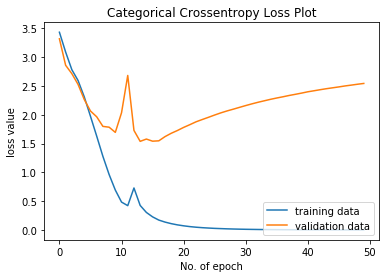

In [154]:
plt.plot(history.history['loss'], label='training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Categorical Crossentropy Loss Plot')
plt.ylabel('loss value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")
plt.show()

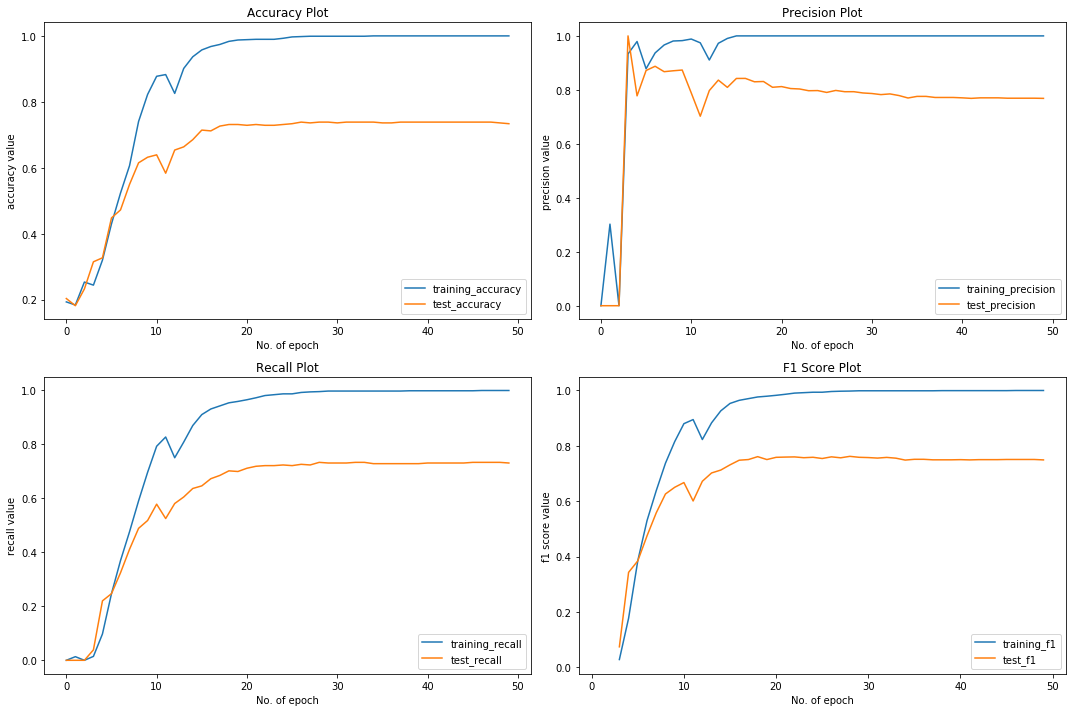

In [155]:
plt.subplots(figsize=(15,10))
ax = plt.subplot(2,2,1)
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='test_accuracy')
plt.title('Accuracy Plot')
plt.ylabel('accuracy value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")

ax = plt.subplot(2,2,2)
plt.plot(history.history['precision'], label='training_precision')
plt.plot(history.history['val_precision'], label='test_precision')
plt.title('Precision Plot')
plt.ylabel('precision value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")

ax = plt.subplot(2,2,3)
plt.plot(history.history['recall'], label='training_recall')
plt.plot(history.history['val_recall'], label='test_recall')
plt.title('Recall Plot')
plt.ylabel('recall value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")

ax = plt.subplot(2,2,4)
plt.plot(history_df['f1_score'], label='training_f1')
plt.plot(history_df['val_f1_score'], label='test_f1')
plt.title('F1 Score Plot')
plt.ylabel('f1 score value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

Below, a predict function is defined that will take as input natural language text and try to classify it into the categories of mental health issues defined from the dataset.

In [158]:
def predict(text):
    processed = preprocess_text(text)
    text_no_stops = [word for word in processed if word not in stop_words]
    tokenized = tokenizer.texts_to_sequences( text_no_stops )
    padded = preprocessing.sequence.pad_sequences( tokenized , maxlen=max_input_length , padding='post' )
    input_data = np.array( padded )
    output = model.predict(input_data)
    index = np.argmax(output[0])
    print(targetdf.columns[index])

In [182]:
predict('''I cannot seem to get along with my co-workers at work.
        This has affected my productivity and it gives me a lot of stress.
        I don't know how to resolve my situation.''')

Social Relationships


Moving on, it is time to try on some transfer learning using the BERT model by Google. BERT has its own pre-processing pipeline which is implemented below for the dataset.

In [112]:
newdf = counseldf

In [113]:
newdf.topics = pd.Categorical(newdf.topics)
newdf['target'] = newdf.topics.cat.codes

Below dataset is divided into train and test sets.

In [114]:
msk = np.random.rand(len(newdf)) < 0.8

train_df = newdf[msk]

test_df = newdf[~msk]

In [115]:
train_df.head()

,questionText,topics,target
1,"I'm planning to have baby, so I have to quit s...",Substance Abuse,29
3,I am extremely possessive in my relationships ...,Behavioral Change,4
5,I want a secure relationship with someone that...,Relationship Dissolution,22
6,I easily recognize this but have no control ov...,Anger Management,2
7,It takes me a long time to fall asleep; I’d es...,Sleep Improvement,25


In [116]:
test_df.head()

,questionText,topics,target
0,My wife and mother are having tense disagreeme...,Family Conflict,12
2,"I have secrets in my mind, and I don't know wh...",Family Conflict,12
4,I had a head injury a few years ago and my min...,Anxiety,3
10,Cheating is something unacceptable for me but ...,Relationships,23
11,I have a lot of issues going on right now. Fir...,Anxiety,3


The below code loads the BERT tokenizer, pre-trained BERT layer and prepares vocabulary file, and tokenizer object for the dataset.

In [190]:
import tensorflow_hub as hub
from tensorflow.keras import layers
import bert

#Loding pretrained bert layer
BertTokenizer = bert.bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=False)


# Loading tokenizer from the bert layer
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
bert_tokenizer = BertTokenizer(vocab_file, do_lower_case)

In [191]:
# function to encode the text into tokens, masks, and segment flags
import numpy as np
def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
            
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

MAX_LEN = 220

# encode train set 
train_input = bert_encode(train_df.questionText.values, bert_tokenizer, max_len=MAX_LEN)
# encode  test set 
test_input = bert_encode(test_df.questionText.values, bert_tokenizer, max_len= MAX_LEN )
train_labels = train_df.target.values

In [120]:
# from tf.keras.utils import to_categorical

categorical_labels = tf.keras.utils.to_categorical(train_labels, num_classes=32)

Finally, the BERT layer incorporated model is define below.

In [121]:
# first define input for token, mask and segment id  
from tensorflow.keras.layers import  Input
input_word_ids = Input(shape=(MAX_LEN,), dtype=tf.int32, name="input_word_ids")
input_mask = Input(shape=(MAX_LEN,), dtype=tf.int32, name="input_mask")
segment_ids = Input(shape=(MAX_LEN,), dtype=tf.int32, name="segment_ids")

#  output  
from tensorflow.keras.layers import Dense
pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])  
clf_output = sequence_output[:, 0, :]
out = Dense(32, activation='sigmoid')(clf_output)   

# intilize model
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
BERT_model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
BERT_model.compile(Adam(lr=2e-6), loss='categorical_crossentropy', metrics=['accuracy'])
BERT_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 220)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 220)]        0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 220)]        0                                            
__________________________________________________________________________________________________
keras_layer_1 (KerasLayer)      [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]           

In [138]:
BERT_model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy', 'Recall', 'Precision'])

In [139]:
# train
train_history = BERT_model.fit(
    train_input, categorical_labels,
    validation_split=0.2,
    epochs=50,
    batch_size=32
)

Epoch 1/50
28/28 [==============================] - 277s 10s/step - loss: 1.6164 - accuracy: 0.5682 - recall: 0.0148 - precision: 0.8667 - val_loss: 2.2249 - val_accuracy: 0.4136 - val_recall: 0.0182 - val_precision: 1.0000
Epoch 2/50
28/28 [==============================] - 286s 10s/step - loss: 1.4952 - accuracy: 0.5716 - recall: 0.0136 - precision: 1.0000 - val_loss: 2.1151 - val_accuracy: 0.4455 - val_recall: 0.0182 - val_precision: 1.0000
Epoch 3/50
28/28 [==============================] - 292s 10s/step - loss: 1.4062 - accuracy: 0.6318 - recall: 0.0159 - precision: 1.0000 - val_loss: 2.1376 - val_accuracy: 0.4682 - val_recall: 0.0182 - val_precision: 1.0000
Epoch 4/50
28/28 [==============================] - 596s 21s/step - loss: 1.3343 - accuracy: 0.6375 - recall: 0.0114 - precision: 1.0000 - val_loss: 2.0733 - val_accuracy: 0.4773 - val_recall: 0.0182 - val_precision: 1.0000
Epoch 5/50
28/28 [==============================] - 299s 11s/step - loss: 1.2865 - accuracy: 0.6557 - re

28/28 [==============================] - 254s 9s/step - loss: 0.5123 - accuracy: 0.9136 - recall: 0.0148 - precision: 1.0000 - val_loss: 1.7229 - val_accuracy: 0.5864 - val_recall: 0.0182 - val_precision: 1.0000
Epoch 38/50
28/28 [==============================] - 258s 9s/step - loss: 0.5024 - accuracy: 0.9182 - recall: 0.0148 - precision: 1.0000 - val_loss: 1.7322 - val_accuracy: 0.6227 - val_recall: 0.0182 - val_precision: 1.0000
Epoch 39/50
28/28 [==============================] - 258s 9s/step - loss: 0.4922 - accuracy: 0.9170 - recall: 0.0148 - precision: 1.0000 - val_loss: 1.7550 - val_accuracy: 0.4955 - val_recall: 0.0182 - val_precision: 1.0000
Epoch 40/50
28/28 [==============================] - 268s 10s/step - loss: 0.4864 - accuracy: 0.9148 - recall: 0.0148 - precision: 1.0000 - val_loss: 1.7042 - val_accuracy: 0.6000 - val_recall: 0.0182 - val_precision: 1.0000
Epoch 41/50
28/28 [==============================] - 256s 9s/step - loss: 0.4741 - accuracy: 0.9295 - recall: 0.014

In [140]:
BERT_model.save('BERT_model.h5')

In [141]:
train_history_df = pd.DataFrame(train_history.history)
train_history_df['f1_score'] = (2 * train_history_df['precision']*train_history_df['recall'])/(train_history_df['precision']+train_history_df['recall'])
train_history_df['val_f1_score'] = (2 * train_history_df['val_precision']*train_history_df['val_recall'])/(train_history_df['val_precision']+train_history_df['val_recall'])

In [142]:
history_df.head(30)

,loss,accuracy,precision,recall,val_loss,val_accuracy,val_precision,val_recall,f1_score,val_f1_score
0,3.428652,0.194185,0.000000,0.000000,3.323464,0.225182,0.000000,0.000000,NaN,NaN
1,3.117190,0.205607,0.324324,0.012461,2.845594,0.205811,0.000000,0.000000,0.024000,NaN
2,2.793204,0.259605,0.000000,0.000000,2.719382,0.256659,0.000000,0.000000,NaN,NaN
3,2.583007,0.257529,0.833333,0.041537,2.496670,0.322034,1.000000,0.077482,0.079130,0.143820
4,2.274577,0.333333,0.896552,0.134995,2.283061,0.338983,0.811881,0.198547,0.234657,0.319066
5,1.963961,0.437175,0.891304,0.255452,2.105474,0.457627,0.920792,0.225182,0.397094,0.361868
6,1.616673,0.562824,0.948012,0.321911,1.965244,0.527845,0.901515,0.288136,0.480620,0.436697
7,1.251614,0.683281,0.971831,0.429907,2.045929,0.542373,0.818627,0.404358,0.596112,0.541329
8,0.921576,0.767394,0.977853,0.596054,1.917342,0.585956,0.855895,0.474576,0.740645,0.610592
9,0.706898,0.839045,0.979971,0.711319,1.901668,0.607748,0.787313,0.510896,0.824308,0.619677


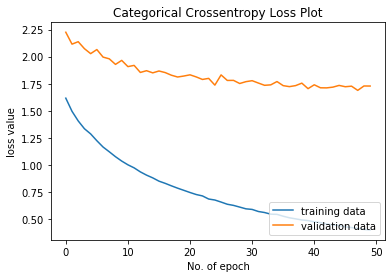

In [143]:
plt.plot(train_history.history['loss'], label='training data')
plt.plot(train_history.history['val_loss'], label='validation data')
plt.title('Categorical Crossentropy Loss Plot')
plt.ylabel('loss value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")
plt.show()

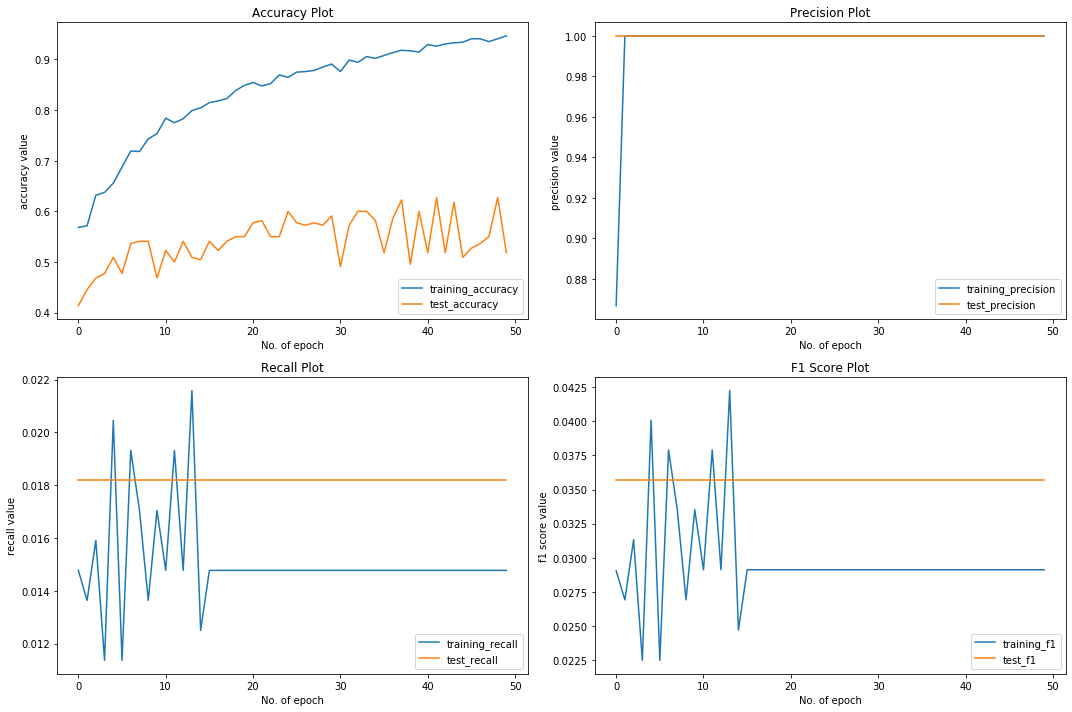

In [144]:
plt.subplots(figsize=(15,10))
ax = plt.subplot(2,2,1)
plt.plot(train_history.history['accuracy'], label='training_accuracy')
plt.plot(train_history.history['val_accuracy'], label='test_accuracy')
plt.title('Accuracy Plot')
plt.ylabel('accuracy value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")

ax = plt.subplot(2,2,2)
plt.plot(train_history.history['precision'], label='training_precision')
plt.plot(train_history.history['val_precision'], label='test_precision')
plt.title('Precision Plot')
plt.ylabel('precision value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")

ax = plt.subplot(2,2,3)
plt.plot(train_history.history['recall'], label='training_recall')
plt.plot(train_history.history['val_recall'], label='test_recall')
plt.title('Recall Plot')
plt.ylabel('recall value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")

ax = plt.subplot(2,2,4)
plt.plot(train_history_df['f1_score'], label='training_f1')
plt.plot(train_history_df['val_f1_score'], label='test_f1')
plt.title('F1 Score Plot')
plt.ylabel('f1 score value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

As the accuracy of the simpler LSTM model turned out better for the dataset, the BERT model is discarded and the previous LSTM model is trined below using the whole dataset.

In [166]:
inputs = tf.keras.layers.Input(shape=(None,))
embedding = tf.keras.layers.Embedding(num_question_tokens, 200, mask_zero=True)(inputs)
lstm_outputs = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_state=False), name='bidir') (embedding)
dense_outputs = tf.keras.layers.Dense(500, activation=tf.keras.activations.relu) (lstm_outputs)
outputs = tf.keras.layers.Dense(32, activation=tf.keras.activations.softmax) (dense_outputs)

final_model = tf.keras.models.Model(inputs, outputs)
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

In [167]:
final_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_3 (Embedding)      (None, None, 200)         483400    
_________________________________________________________________
bidir (Bidirectional)        (None, 200)               240800    
_________________________________________________________________
dense_7 (Dense)              (None, 500)               100500    
_________________________________________________________________
dense_8 (Dense)              (None, 32)                16032     
Total params: 840,732
Trainable params: 840,732
Non-trainable params: 0
_________________________________________________________________


In [168]:
final_history = final_model.fit(input_data, targetdf, batch_size=128, epochs=25, verbose=1)

Epoch 1/25
11/11 [==============================] - 21s 2s/step - loss: 3.3879 - accuracy: 0.1708 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/25
11/11 [==============================] - 21s 2s/step - loss: 2.8946 - accuracy: 0.2064 - precision: 0.4068 - recall: 0.0174
Epoch 3/25
11/11 [==============================] - 21s 2s/step - loss: 2.5663 - accuracy: 0.2580 - precision: 1.0000 - recall: 0.0385
Epoch 4/25
11/11 [==============================] - 22s 2s/step - loss: 2.1701 - accuracy: 0.3430 - precision: 0.9006 - recall: 0.2042
Epoch 5/25
11/11 [==============================] - 22s 2s/step - loss: 1.7881 - accuracy: 0.4964 - precision: 0.8949 - recall: 0.2907
Epoch 6/25
11/11 [==============================] - 22s 2s/step - loss: 1.3345 - accuracy: 0.6257 - precision: 0.9488 - recall: 0.4440
Epoch 7/25
11/11 [==============================] - 23s 2s/step - loss: 0.9865 - accuracy: 0.7485 - precision: 0.9715 - recall: 0.5698
Epoch 8/25
11/11 [=============================

In [179]:
final_model.save('Final_LSTM_model.h5')

In [169]:
def predict(text):
    processed = preprocess_text(text)
    text_no_stops = [word for word in processed if word not in stop_words]
    tokenized = tokenizer.texts_to_sequences( text_no_stops )
    padded = preprocessing.sequence.pad_sequences( tokenized , maxlen=max_input_length , padding='post' )
    input_data = np.array( padded )
    output = final_model.predict(input_data)
    index = np.argmax(output[0])
    print(targetdf.columns[index])

In [192]:
predict('''I fight with my husband everyday. We cannot seem to agree on anything.
        The marriage is failing and I need to now do a divorce. This has affected my mentally.
        I cannot stop but think about all the memories we had and I was about to loose everything that mattered.''')

Relationships
